# Objective

#### 1. Explore the dataset and extract insights using Exploratory Data Analysis.
#### 2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? 
#### 3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
#### 4. Is the proportion of smokers significantly different across different regions? 
#### 5. Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

## Import packages

### File name: Axisinsurance.csv
#### . Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
#### . Sex - This is the policy holder's gender, either male or female.
#### . BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
#### . Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
#### . Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
#### . Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
#### . Charges - Individual medical costs billed to health insurance


In [1]:
#Import packages
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy.stats import   ttest_1samp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read datasets
axisinsurance = pd.read_csv('AxisInsurance.csv')

# Task 1: Exploring data sets (structures, missing data etc)

In [5]:
# View the 1st 5 rows of the data
axisinsurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Explore ths shape of dataset
axisinsurance.shape

(1338, 7)

In [9]:
axisinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [40]:
# Convert "Objects" to "Category" to reduce data space
axisinsurance["sex"] = axisinsurance["sex"].astype("category")
axisinsurance["region"] = axisinsurance["region"].astype("category")
axisinsurance["smoker"] = axisinsurance["smoker"].astype("category")

In [33]:
axisinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age         1338 non-null int64
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null category
region      1338 non-null object
charges     1338 non-null float64
religion    1338 non-null category
dtypes: category(3), float64(2), int64(2), object(1)
memory usage: 56.5+ KB


In [36]:
# Explore the statistics of quantitave datasets
axisinsurance.describe().round(1)

,age,bmi,children,charges
count,1338.0,1338.0,1338.0,1338.0
mean,39.2,30.7,1.1,13270.4
std,14.0,6.1,1.2,12110.0
min,18.0,16.0,0.0,1121.9
25%,27.0,26.3,0.0,4740.3
50%,39.0,30.4,1.0,9382.0
75%,51.0,34.7,2.0,16639.9
max,64.0,53.1,5.0,63770.4


In [39]:
# Examine statistics of qualitive datasets
axisinsurance.describe(include=["category"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
# To confirm there is no missing data
axisinsurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Task 2: Analysis using Exploratory Data Analysis

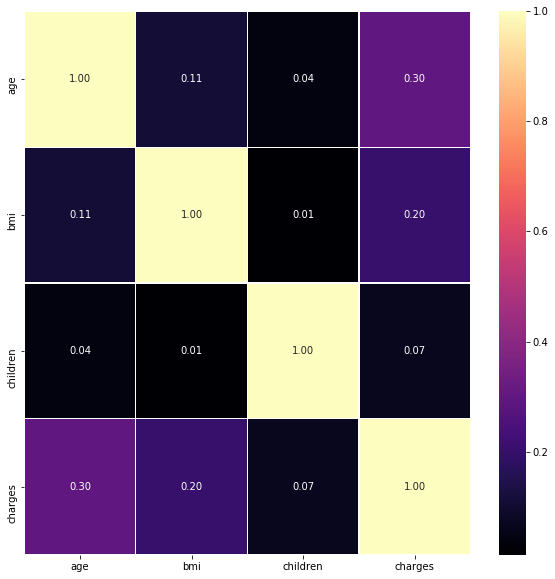

In [3]:
# Bivariate analysis to understand relationship among quantitative data
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(axisinsurance.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")  
plt.show()

In [13]:
#To provide a quick peek on the skewness of the datasets
axisinsurance.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [11]:
age_group = pd.cut(axisinsurance['age'], bins=[17, 25, 44, 64])
age_group

0       (17, 25]
1       (17, 25]
2       (25, 44]
3       (25, 44]
4       (25, 44]
5       (25, 44]
6       (44, 64]
7       (25, 44]
8       (25, 44]
9       (44, 64]
10      (17, 25]
11      (44, 64]
12      (17, 25]
13      (44, 64]
14      (25, 44]
15      (17, 25]
16      (44, 64]
17      (17, 25]
18      (44, 64]
19      (25, 44]
20      (44, 64]
21      (25, 44]
22      (17, 25]
23      (25, 44]
24      (25, 44]
25      (44, 64]
26      (44, 64]
27      (44, 64]
28      (17, 25]
29      (25, 44]
          ...   
1308    (17, 25]
1309    (25, 44]
1310    (25, 44]
1311    (25, 44]
1312    (25, 44]
1313    (17, 25]
1314    (25, 44]
1315    (17, 25]
1316    (17, 25]
1317    (17, 25]
1318    (25, 44]
1319    (25, 44]
1320    (25, 44]
1321    (44, 64]
1322    (44, 64]
1323    (25, 44]
1324    (25, 44]
1325    (44, 64]
1326    (25, 44]
1327    (44, 64]
1328    (17, 25]
1329    (44, 64]
1330    (44, 64]
1331    (17, 25]
1332    (44, 64]
1333    (44, 64]
1334    (17, 25]
1335    (17, 2

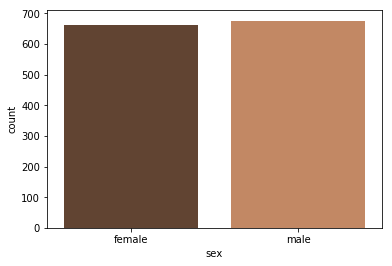

In [6]:
sns.countplot(axisinsurance["sex"], palette = 'copper')
plt.show()

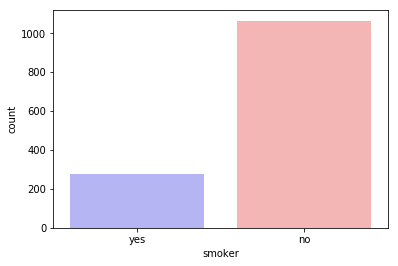

In [7]:
sns.countplot(axisinsurance["smoker"], palette = 'bwr')
plt.show()

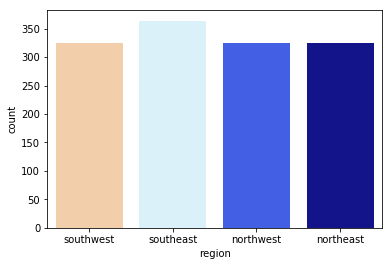

In [8]:
sns.countplot(axisinsurance["region"], palette = 'flag')
plt.show()

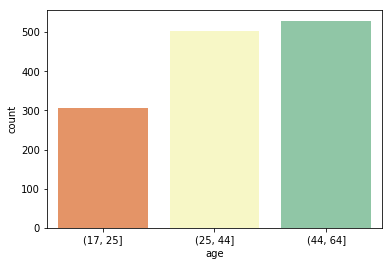

In [12]:
sns.countplot(age_group, palette = 'Spectral')
plt.show()

C:\Users\Acer\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


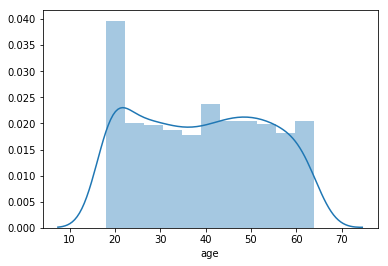

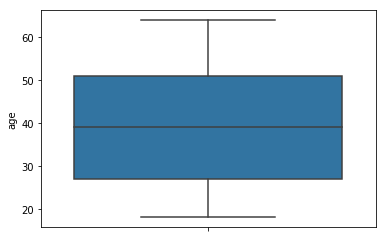

In [13]:
sns.distplot(axisinsurance['age'])
plt.show()
sns.boxplot(axisinsurance['age'],orient='v')
plt.show()

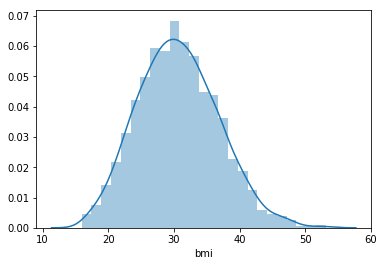

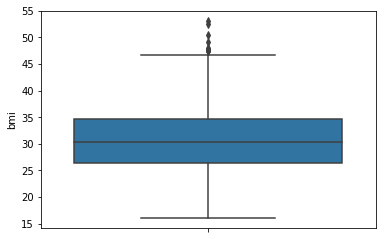

In [86]:
sns.distplot(axisinsurance['bmi'])
plt.show()
sns.boxplot(axisinsurance['bmi'],orient='v')
plt.show()

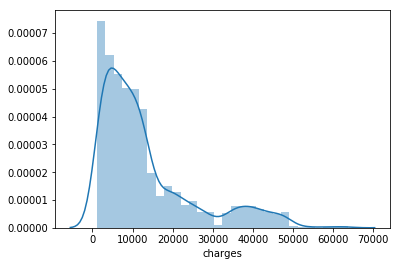

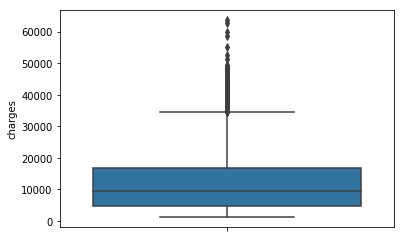

In [85]:
sns.distplot(axisinsurance['charges'])
plt.show()
sns.boxplot(axisinsurance['charges'],orient='v')
plt.show()

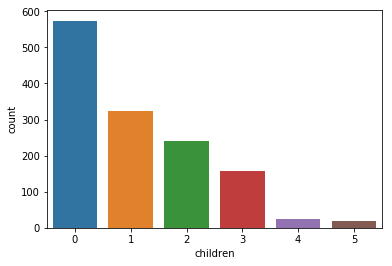

In [84]:
sns.countplot(axisinsurance['children'])
plt.show()

### Bivariate analysis: Determine if insurance charges are the same across age, sex, region & smoker status

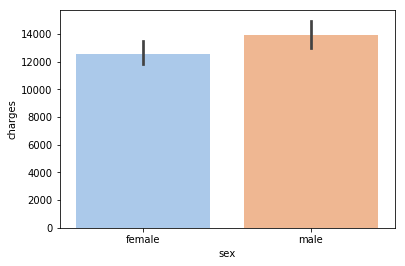

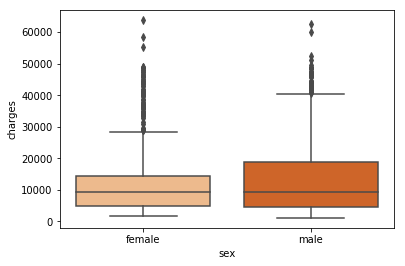

In [151]:
# Charges vs sex
sns.barplot(data=axisinsurance, x="sex", y="charges",palette ='pastel')
plt.show()
sns.boxplot(axisinsurance['sex'],axisinsurance['charges'], palette = "Oranges")

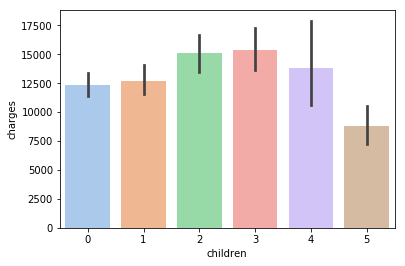

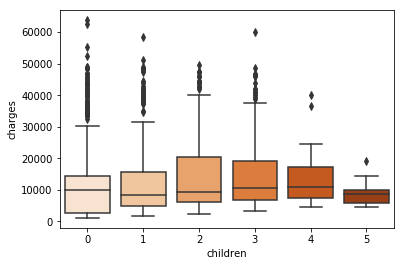

In [150]:
# Charges vs no. of children
sns.barplot(data=axisinsurance, x="children", y="charges",palette ='pastel')
plt.show()
sns.boxplot(axisinsurance['children'],axisinsurance['charges'], palette = 'Oranges')

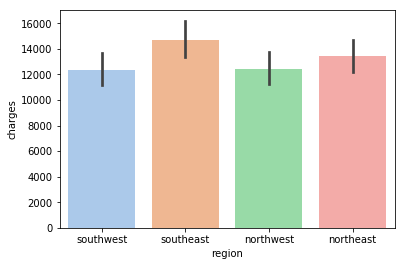

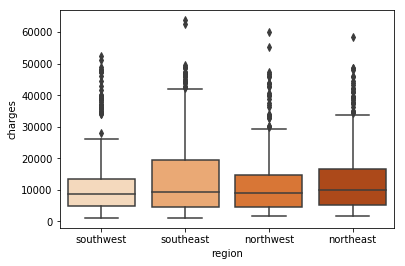

In [152]:
# Charges vs region
sns.barplot(data=axisinsurance, x="region", y="charges",palette ='pastel')
plt.show()
sns.boxplot(axisinsurance['region'],axisinsurance['charges'], palette = 'Oranges')

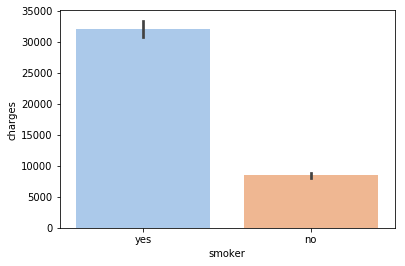

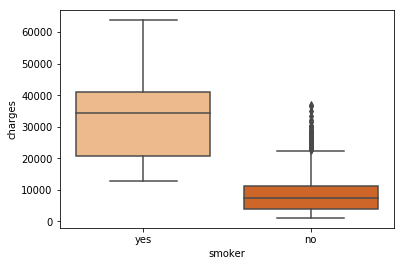

In [128]:
# Charges vs smoking status
sns.barplot(data=axisinsurance, x="smoker", y="charges",palette ='pastel')
plt.show()
sns.boxplot(axisinsurance['smoker'],axisinsurance['charges'], palette = 'Oranges')

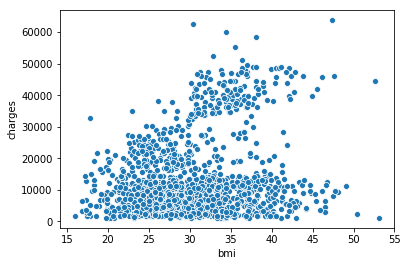

In [11]:
sns.scatterplot (axisinsurance["bmi"], axisinsurance["charges"])

### Bivariate analysis: Determine if BMI are the same across age, gender, region and smoking status

C:\Users\Acer\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


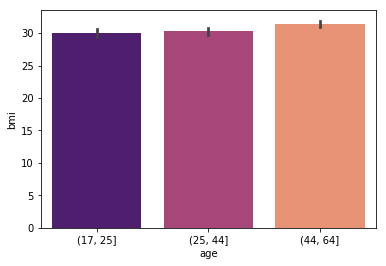

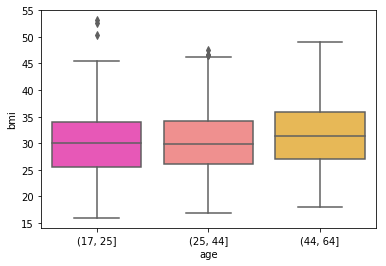

In [14]:
# BMI vs age
sns.barplot(data=axisinsurance, x=age_group, y="bmi",palette ='magma')
plt.show()
sns.boxplot(age_group,axisinsurance['bmi'], palette = 'spring')

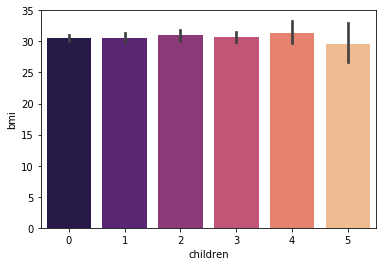

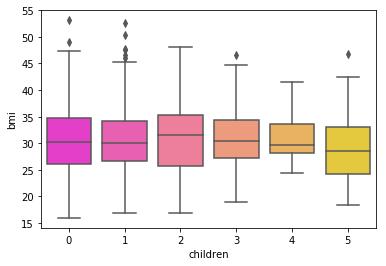

In [168]:
# BMI vs no. of children
sns.barplot(data=axisinsurance, x="children", y="bmi",palette ='magma')
plt.show()
sns.boxplot(axisinsurance['children'],axisinsurance['bmi'], palette = 'spring')

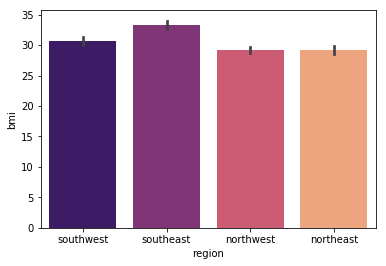

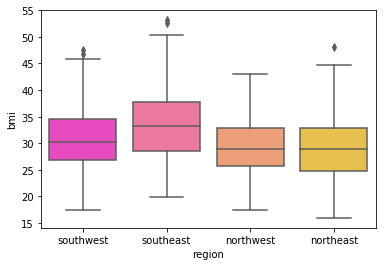

In [169]:
# BMI vs region
sns.barplot(data=axisinsurance, x="region", y="bmi",palette ='magma')
plt.show()
sns.boxplot(axisinsurance['region'],axisinsurance['bmi'], palette = 'spring')

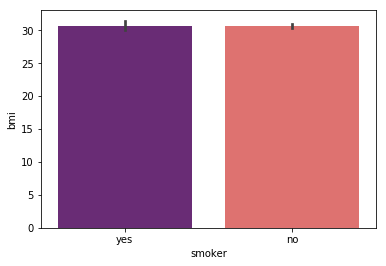

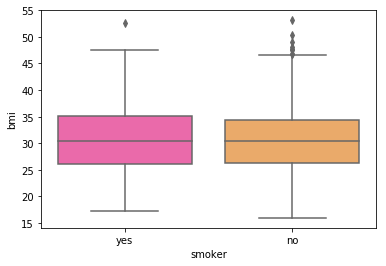

In [170]:
# BMI vs smoking status
sns.barplot(data=axisinsurance, x="smoker", y="bmi",palette ='magma')
plt.show()
sns.boxplot(axisinsurance['smoker'],axisinsurance['bmi'], palette = 'spring')

### Multivariate analysis on Charges 

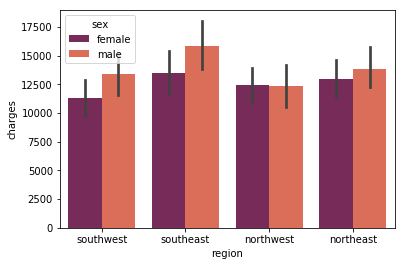

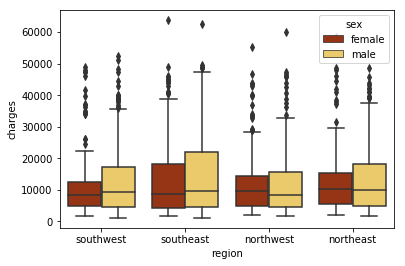

In [146]:
sns.barplot(axisinsurance["region"], axisinsurance["charges"], hue = axisinsurance["sex"], palette = "rocket")
plt.show()
sns.boxplot(axisinsurance["region"],axisinsurance["charges"], hue=axisinsurance["sex"], palette = "afmhot")

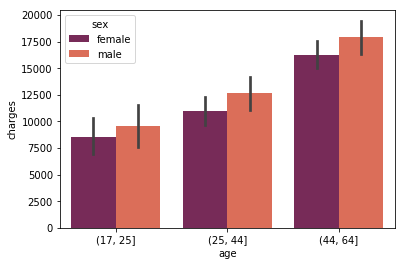

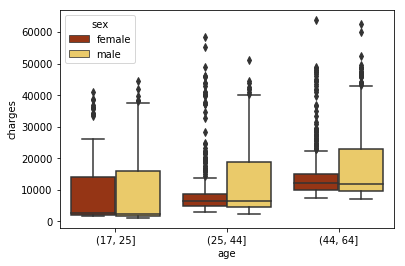

In [15]:
sns.barplot(age_group, axisinsurance["charges"], hue = axisinsurance["sex"], palette = "rocket")
plt.show()
sns.boxplot(age_group,axisinsurance["charges"],hue = axisinsurance["sex"], palette = 'afmhot')

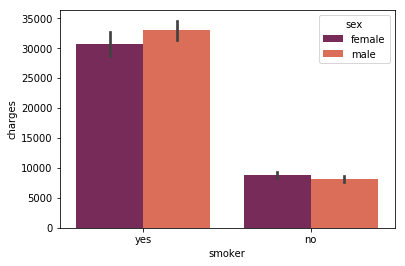

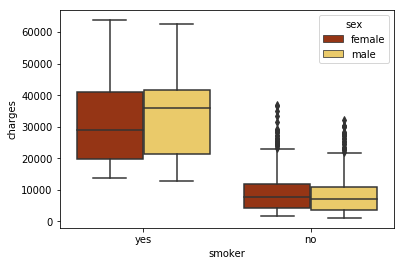

In [144]:
sns.barplot(axisinsurance["smoker"], axisinsurance["charges"], hue = axisinsurance["sex"], palette = "rocket")
plt.show()
sns.boxplot(axisinsurance["smoker"],axisinsurance["charges"], hue=axisinsurance["sex"], palette = "afmhot")

C:\Users\Acer\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


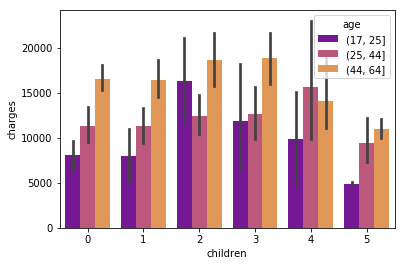

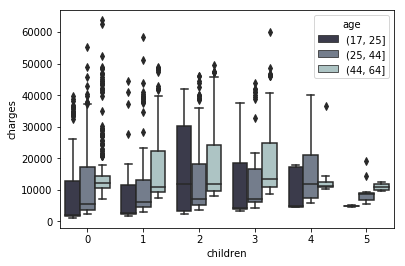

In [23]:
sns.barplot(axisinsurance["children"], axisinsurance["charges"], hue = age_group, palette = "plasma")
plt.show()
sns.boxplot(axisinsurance["children"],axisinsurance["charges"], hue=age_group, palette = "bone")

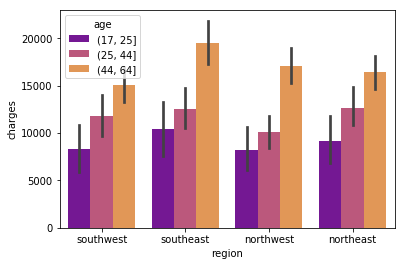

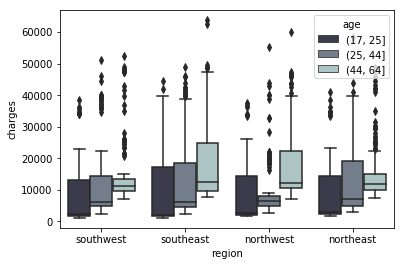

In [25]:
sns.barplot(axisinsurance["region"], axisinsurance["charges"], hue = age_group, palette = "plasma")
plt.show()
sns.boxplot(axisinsurance["region"],axisinsurance["charges"], hue=age_group, palette = "bone")

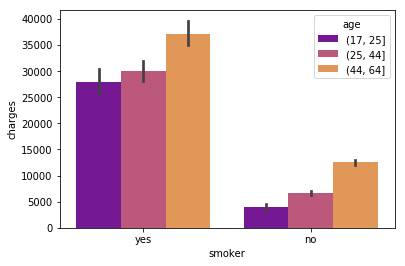

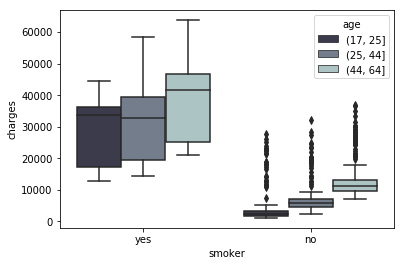

In [26]:
sns.barplot(axisinsurance["smoker"], axisinsurance["charges"], hue = age_group, palette = "plasma")
plt.show()
sns.boxplot(axisinsurance["smoker"],axisinsurance["charges"], hue=age_group, palette = "bone")

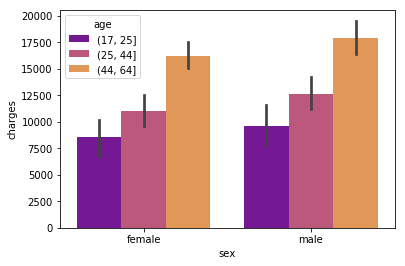

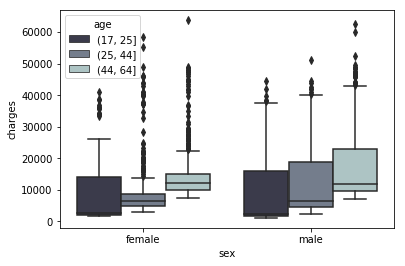

In [28]:
sns.barplot(axisinsurance["sex"], axisinsurance["charges"], hue = age_group, palette = "plasma")
plt.show()
sns.boxplot(axisinsurance["sex"],axisinsurance["charges"], hue=age_group, palette = "bone")

## Multivariate analysis on BMI

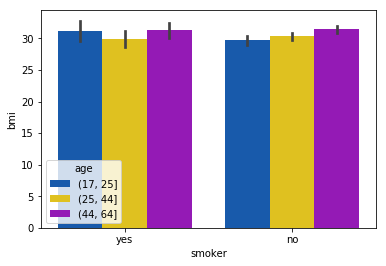

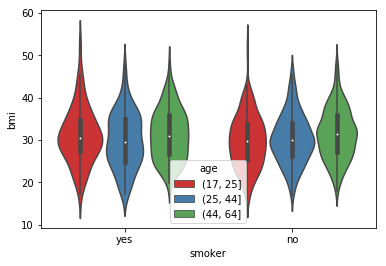

In [17]:
sns.barplot(axisinsurance["smoker"],axisinsurance["bmi"], hue=age_group, palette = "prism")
plt.show()
sns.violinplot(axisinsurance["smoker"],axisinsurance["bmi"], hue=age_group, palette = "Set1")

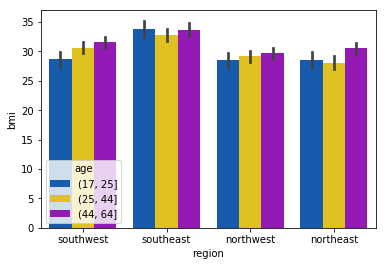

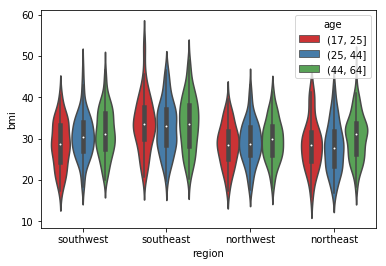

In [18]:
sns.barplot(axisinsurance["region"],axisinsurance["bmi"], hue=age_group, palette = "prism")
plt.show()
sns.violinplot(axisinsurance["region"],axisinsurance["bmi"], hue=age_group, palette = "Set1")

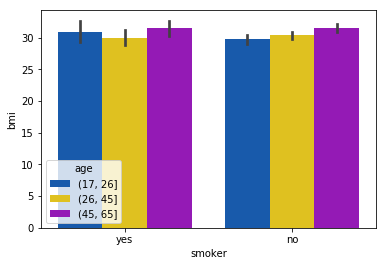

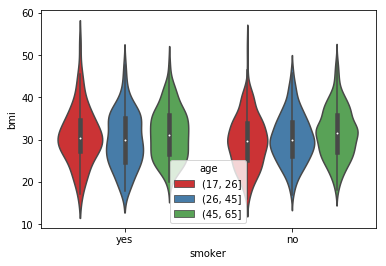

In [158]:
sns.barplot(axisinsurance["smoker"],axisinsurance["bmi"], hue=age_group, palette = "prism")
plt.show()
sns.violinplot(axisinsurance["smoker"],axisinsurance["bmi"], hue=age_group, palette = "Set1")

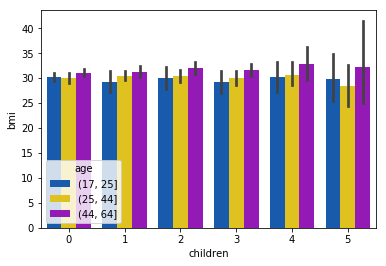

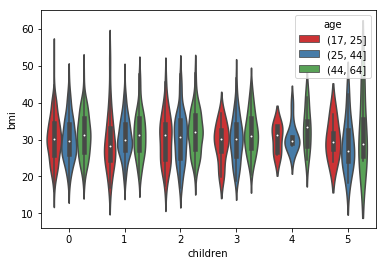

In [20]:
sns.barplot(axisinsurance["children"],axisinsurance["bmi"], hue=age_group, palette = "prism")
plt.show()
sns.violinplot(axisinsurance["children"],axisinsurance["bmi"], hue=age_group, palette = "Set1")

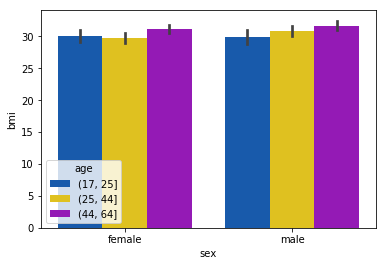

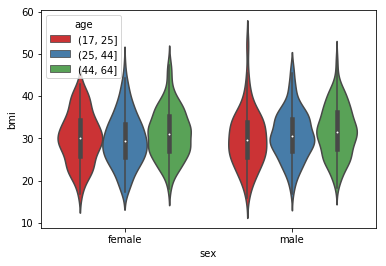

In [19]:
sns.barplot(axisinsurance["sex"],axisinsurance["bmi"], hue=age_group, palette = "prism")
plt.show()
sns.violinplot(axisinsurance["sex"],axisinsurance["bmi"], hue=age_group, palette = "Set1")

#### BMI vs sex vs region/smoking status/children

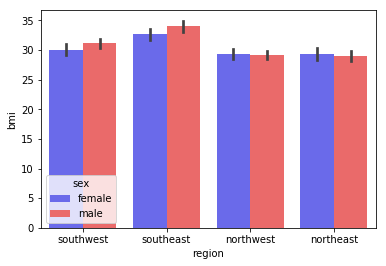

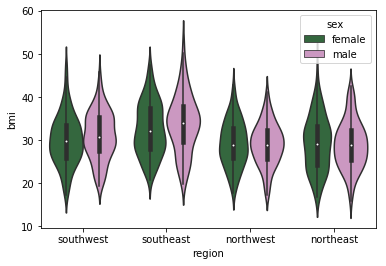

In [166]:
sns.barplot(axisinsurance["region"],axisinsurance["bmi"], hue=axisinsurance["sex"], palette = "seismic")
plt.show()
sns.violinplot(axisinsurance["region"],axisinsurance["bmi"], hue=axisinsurance["sex"], palette = "cubehelix")

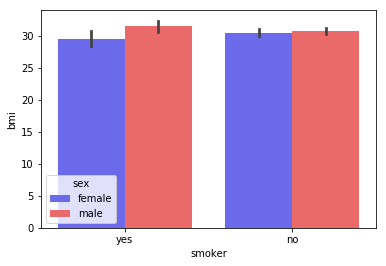

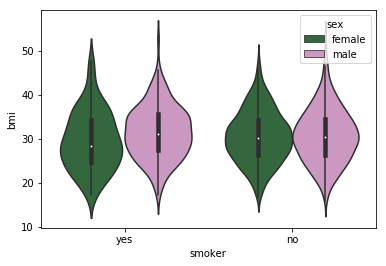

In [165]:
sns.barplot(axisinsurance["smoker"],axisinsurance["bmi"], hue=axisinsurance["sex"], palette = "seismic")
plt.show()
sns.violinplot(axisinsurance["smoker"],axisinsurance["bmi"], hue=axisinsurance["sex"], palette = "cubehelix")

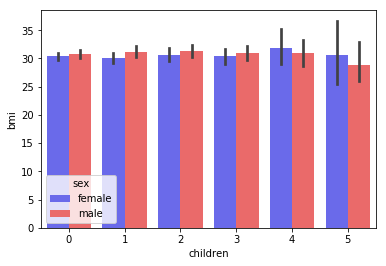

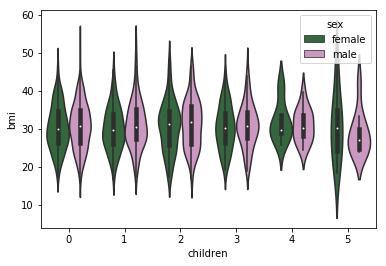

In [164]:
sns.barplot(axisinsurance["children"],axisinsurance["bmi"], hue=axisinsurance["sex"], palette = "seismic")
plt.show()
sns.violinplot(axisinsurance["children"],axisinsurance["bmi"], hue=axisinsurance["sex"], palette = "cubehelix")

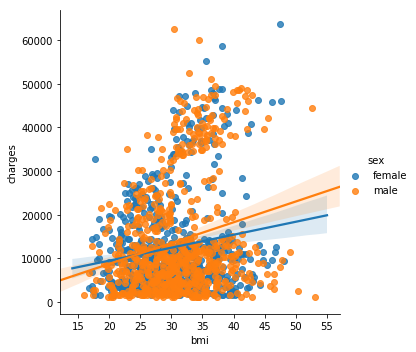

In [37]:
sns.lmplot(y="charges", x="bmi", hue = "sex", data = axisinsurance)
plt.show()

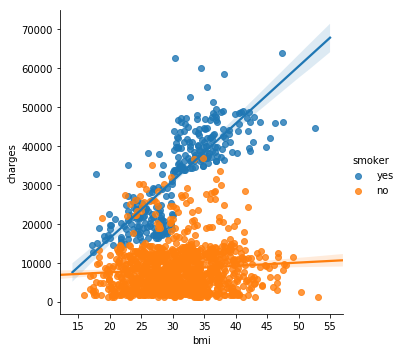

In [36]:
sns.lmplot(y="charges", x="bmi", hue = "smoker", data = axisinsurance)
plt.show()

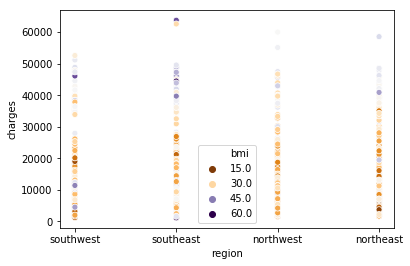

In [33]:
sns.scatterplot(y="charges", x="region", hue = "bmi", data = axisinsurance, palette = "PuOr")
plt.show()

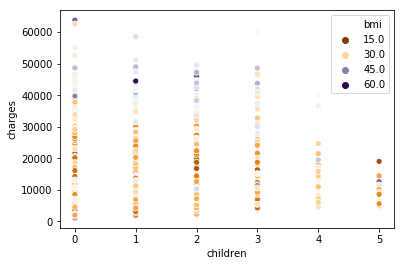

In [35]:
sns.scatterplot(y="charges", x="children", hue = "bmi", data = axisinsurance, palette = "PuOr")
plt.show()

# Task 3: Identify if medical claims made by those who smoke are greater than those who do not.

#### Let mean insurance charges for smokers be mu_smoke and for non-smokers, mean charges is mu_nonsmoke.

## Null Hypothesis: Medical claims by smokers and non-smokers are the same
#### H0: mu_smoke = mu_nonsmoke

## Alternate Hypothesis: Medical claims by smokers are greater than non-smokers
#### H1: mu_smoke > mu_nonsmoke

In [4]:
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

In [5]:
# Seperating the data into 2 groups
smoker = axisinsurance ["smoker"] == "yes"
smoker = axisinsurance[smoker]["charges"]
nonsmoker = axisinsurance["smoker"] == "no"
nonsmoker = axisinsurance[nonsmoker]["charges"]

### Discover the distribution of medical claims by smoker (blue) and non-smoker (green)
Medical claims by smokers and non-smokers and not normally distributed

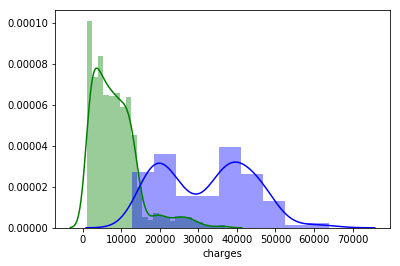

In [38]:
sns.distplot (nonsmoker, color = 'green')
sns.distplot (smoker, color = "blue")
plt.show()

## Compute p-value (One-tailed Mann-Whitney U test)
### Why not one-tailed t test? This is because the 2 samples are not normally distributed. If we were to use t-test, we are assuming that both samples have normal distribution

In [39]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu (smoker, nonsmoker)
print(stat, p/2)

7403.0 1.3175583611258927e-130


In [6]:
# two-sample one-tailed t-test
# null hypothesis: the two groups have the same mean
# this test assumes the two groups have the same variance
t_statistic, p_value = ttest_ind(smoker, nonsmoker)
print(t_statistic, p_value/2)

46.664921172723716 4.1357179210886093e-283


## Decide whether we have enough evidence to reject null hypothesis

In [42]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p/2 < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance. \nHence, there is enough evidence to prove that medical claims made by smokers are higher than non-smokers.')
else:
    print('We have insufficient evidence to reject the null hypothesis since p value is greater than the Level of significance. \nHence, medical claims made by smokers and non-smokers are the same') 

print ("Our Mann-Whitney U test has p-value=", p/2)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value is less than the Level of significance. 
Hence, there is enough evidence to prove that medical claims made by smokers are higher than non-smokers.
Our Mann-Whitney U test has p-value= 1.3175583611258927e-130


### Conclusion:
At 95% confidence interval, we have enough evidence to prove that medical claims made by smokers are higher than non-smokers.

# Task 4: Determine if BMI of males and females are different

#### Let mean BMI for females be mu_bmi_female and for males, mean charges is mu_bmi_male.

## Null Hypothesis: BMI of males and females are the same
#### H0: mu_bmi_female = mu_bmi_male

## Alternate Hypothesis: BMI of males and females are different
#### H1: mu_bmi_female != mu_bmi_male

In [26]:
# Seperating the data into 2 groups
male = axisinsurance ["sex"] == "male"
male = axisinsurance[male]["charges"]
female = axisinsurance["sex"] == "female"
female = axisinsurance[female]["charges"]

## Compute p-value (Two-tailed unpaired t-test)

In [29]:
# two-sample one-tailed t-test
# null hypothesis: the two groups have the same mean BMI
# this test assumes the two groups have the same variance
t_statistic, p_value = ttest_ind(male, female)
print(t_statistic, p_value)

2.097546590051688 0.03613272100592976


## Decide if there is enough evidence to reject null hypothesis

In [30]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance. \nHence, there is enough evidence to prove that BMI between males and females are different.')
else:
    print('We have insufficient evidence to reject the null hypothesis since p value is greater than the Level of significance. \nHence, BMI of both genders are the same') 

print ("Our two-sample one-tailed t-test p-value=", p_value)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value is less than the Level of significance. 
Hence, there is enough evidence to prove that BMI between males and females are different.
Our two-sample one-tailed t-test p-value= 0.03613272100592976


### Conclusion:
At 95% confidence interval, we have enough evidence to prove that BMI between males and females are different.

# Task 5: Explore whether the proportion of smokers are significantly different across different regions

## Test of Proportion using Chi-Squared Test
'Smoker' and 'Region' are catetgorical data

## Null hypothesis: Proportion of smokers are not different across different regions
#### H0: Proportions are equal

## Alternate hypothesis: Proportion of smokers are  different across different regions
#### H1: Proportions are not equal

In [55]:
ax = axisinsurance.copy()

In [66]:
# To include data from smokers only
smoker= ax[ax["smoker"]=="yes"]
smoker.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [73]:
# number of smoker in each region
smoker["region"].value_counts()

southeast    91
northeast    67
southwest    58
northwest    58
Name: region, dtype: int64

In [77]:
northeast = axisinsurance[axisinsurance['region'] == 'northeast'].smoker.value_counts()[1]  # number of northeastern smokers
northwest = axisinsurance[axisinsurance['region'] == 'northwest'].smoker.value_counts()[1] # number of northwestern smokers
southeast = axisinsurance[axisinsurance['region'] == 'southeast'].smoker.value_counts()[1] # number of southeastern smokers
southwest = axisinsurance[axisinsurance['region'] == 'southwest'].smoker.value_counts()[1] # number of southwestern smokers 

In [75]:
ax['region'].value_counts() #find out the sample size of each region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [84]:
#Provide a variable to sample size of each region
n_southeast = ax['region'].value_counts()[0]
n_southwest = ax['region'].value_counts()[1]
n_northwest = ax['region'].value_counts()[2]
n_northeast = ax['region'].value_counts()[3]

In [87]:
# Calculate proportion of smokers in each region
print([southeast, southwest, northeast, northwest] , [n_southeast, n_southwest, n_northwest, n_northeast])
print ("Proportion of smokers in southeast region is", southeast/n_southeast)
print ("Proportion of smokers in southwest region is", southwest/n_southwest)
print ("Proportion of smokers in northwest region is", northwest/n_northwest)
print ("Proportion of smokers in northeast region is", northeast/n_northeast)

[91, 58, 67, 58] [364, 325, 325, 324]
Proportion of smokers in southeast region is 0.25
Proportion of smokers in southwest region is 0.17846153846153845
Proportion of smokers in northwest region is 0.17846153846153845
Proportion of smokers in northeast region is 0.20679012345679013


In [78]:
# To build contingency table
data_crosstab = pd.crosstab(ax['region'],  
                            ax['smoker'], 
                                margins = False) 
print(data_crosstab) 

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


### Calculate p-value

In [81]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy

In [202]:
observed_values    = scipy.array([southeast/n_southeast, southwest/n_southwest, northwest/n_northwest, northeast/n_northeast])
n                  = observed_values.sum()

expected_values    = scipy.array([n*0.25, n*0.25, n*0.25, n*0.25])

chi_square_stat, p_value_chi = stats.chisquare(observed_values, f_exp=expected_values)

print(chi_square_stat, p_value_chi)
print('At 5 %s level of significance, the p-value is %1.7f' %('%', p_value_chi))

0.016845755775777724 0.9994214234759894
At 5 % level of significance, the p-value is 0.9994214


### Determine whether we have enough evidence to reject H0

In [201]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value_chi < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance. \nHence, there is enough evidence to prove that proportion of smoker across regions are different.')
else:
    print('We have insufficient evidence to reject the null hypothesis since p value is greater than the Level of significance. \nHence, we cannot reject the null hypothesis - proportion of smokers across different regions are the same') 

print ("Our Chi-square test has a p-value of", p_value_chi)

Level of significance: 0.05
We have insufficient evidence to reject the null hypothesis since p value is greater than the Level of significance. 
Hence, we cannot reject the null hypothesis - proportion of smokers across different regions are the same
Our Chi-square test has a p-value of 0.9994214234759894


## Conclusion
At 95% confidence interval, we **DO NOT** have enough evidence to prove that proportion of smokers across different regions are different

# Task 6: Check if BMI of women with 0, 1 & 2 child(ren) are the same

## One way ANOVA

## Null hypothesis: BMI of women with 0, 1 & 2 child(ren) are not different
H0: Mu0 = Mu1 = Mu2, where Mu0 is the mean BMI of women with 0 child, Mu1 the mean BMI of women with 1 child and Mu2 the mean of BMI of women with 2 children

## Alternate hypothesis: BMI of women with 0, 1 & 2 child(ren) are different
H1: At least 1 Mu is different

In [185]:
ax2 = axisinsurance.copy()

In [186]:
ax2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [187]:
# To include data from female only
women= ax2[ax2["sex"]=="female"]
women.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [197]:
# Mean BMI of women with 0 child
zero_child = women[women["children"] == 0]
zero_child_mean = zero_child["bmi"].mean()
print("The mean BMI of women with no child is", zero_child_mean)

# Mean BMI of women with 1 child
one_child = women[women["children"] == 1]
one_child_mean = one_child["bmi"].mean()
print("The mean BMI of women with 1 child is", one_child_mean)


# Mean BMI of women with 2 children
two_child = women[women["children"] == 2]
two_child_mean = two_child["bmi"].mean()
print("The mean BMI of women with 2 children is", two_child_mean)

The mean BMI of women with no child is 30.361522491349486
The mean BMI of women with 1 child is 30.05265822784811
The mean BMI of women with 2 children is 30.64978991596637


In [195]:
# Seeing if the overall model is significant
F, p_anova = stats.f_oneway(zero_child["bmi"], one_child["bmi"], two_child["bmi"])
print('F-Statistic=%.3f, p=%.3f' % (F, p_anova))
print("At 95% confidence interval, the p-value of the one-way ANOVA test is", p_anova)

F-Statistic=0.334, p=0.716
At 95% confidence interval, the p-value of the one-way ANOVA test is 0.7158579926754841


### Determine if we have enough evidence to reject H0

In [200]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_anova < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value is less than the Level of significance. \nHence, there is enough evidence to prove that BMI among women with 0, 1 and 2 child(ren) are different.')
else:
    print('We have insufficient evidence to reject the null hypothesis since p value is greater than the Level of significance. \nHence, we cannot reject the null hypothesis - BMI among women with 0, 1 and 2 child(ren) are the same') 

print ("Our one-way ANOVA test has a p-value of", p_anova)

Level of significance: 0.05
We have insufficient evidence to reject the null hypothesis since p value is greater than the Level of significance. 
Hence, we cannot reject the null hypothesis - BMI among women with 0, 1 and 2 child(ren) are the same
Our one-way ANOVA test has a p-value of 0.7158579926754841


## Conclusion
At 95% confidence interval, we **DO NOT** have enough evidence to prove that BMI of women with 0, 1 and 2 child(ren) are different